# Time series analysis

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [2]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is BADF-214A

 Directory of C:\Users\girij\Documents\gl\jainUniversity

14-10-2023  04:49 PM    <DIR>          .
14-10-2023  04:49 PM    <DIR>          ..
14-10-2023  04:11 PM    <DIR>          .ipynb_checkpoints
14-10-2023  04:10 PM             6,715 1.+Getting+Time+Series+Data.ipynb
14-10-2023  04:28 PM           482,460 2.+Handling+Missing+Values.ipynb
14-10-2023  04:45 PM           238,128 3.+Handling+Outlier+Values.ipynb
14-10-2023  04:49 PM           518,802 4.+Time+series+decomposition.ipynb
14-10-2023  01:39 PM           506,258 5.+Splitting+Time+Series+Data.ipynb
14-10-2023  01:28 PM             1,857 Customers_in_a_Shop.csv
14-10-2023  01:39 PM    <DIR>          TSA_FINAL
               6 File(s)      1,754,220 bytes
               4 Dir(s)  224,984,956,928 bytes free


In [3]:
#Reading the dataset

data = pd.read_csv('Customers_in_a_Shop.csv',header=None)


In [4]:
data.head()

,0,1
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0


In [5]:
data.columns = ['Date','Customers']


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       144 non-null    object 
 1   Customers  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [7]:
data.head()

,Date,Customers
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0


In [8]:
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       144 non-null    datetime64[ns]
 1   Customers  140 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [10]:
data = data.set_index('Date')

data.shape

(144, 1)

In [11]:
data.head()

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0


## Missing Values

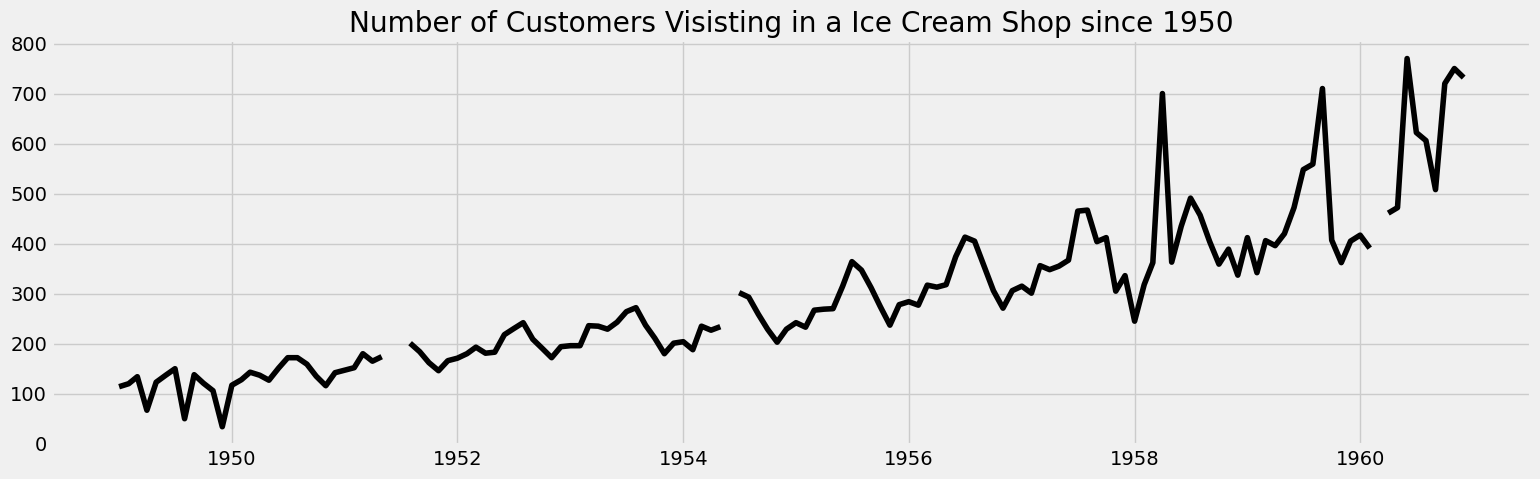

In [12]:
#Checking for the missing values

plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='black')
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

## We have the following methods for treating missing values in the time series data.
1)	Mean Imputation

2)	Last Observation Carried forward

3)	Linear Interpolation

4)	Seasonal Interpolation


## Mean Imputation

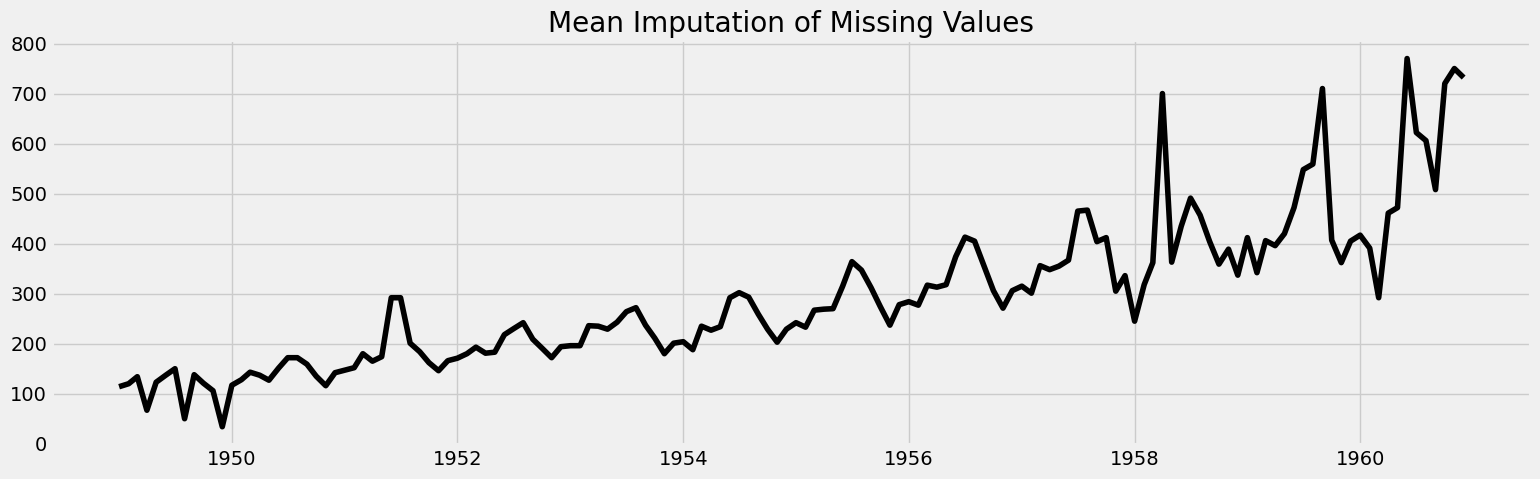

In [13]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_mean'] = data['Customers'].fillna(data['Customers'].mean())
plt.plot(data['Customers_mean'],color='black')
plt.title("Mean Imputation of Missing Values")
plt.show()

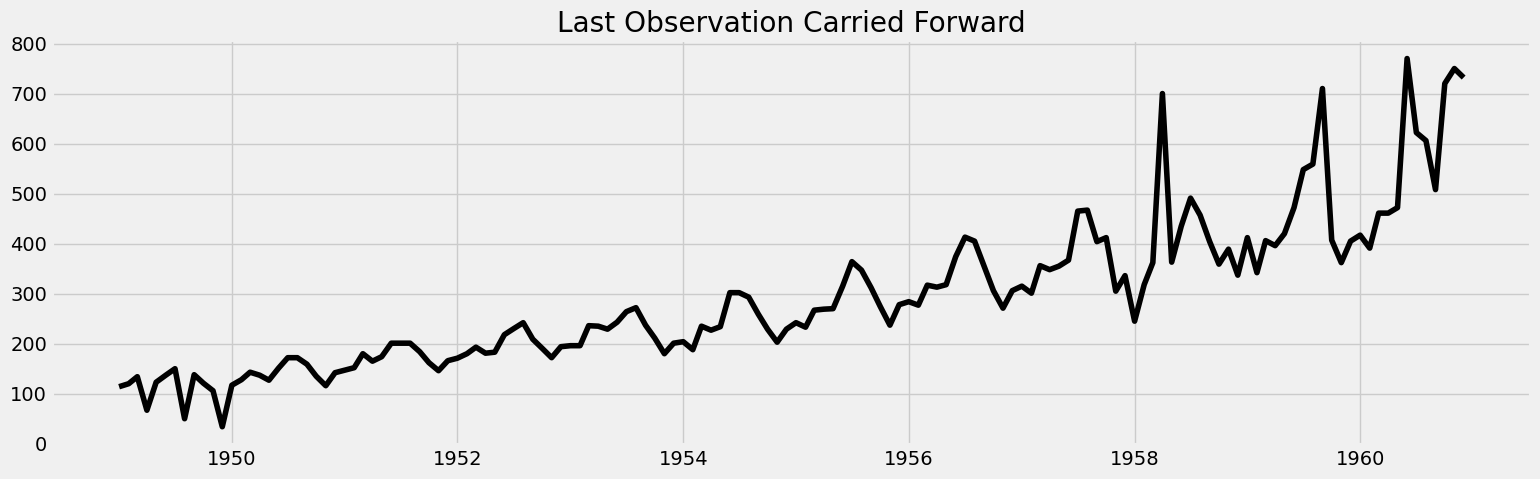

In [14]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_mean'] = data['Customers'].bfill()
plt.plot(data['Customers_mean'],color='black')
plt.title("Last Observation Carried Forward")
plt.show()

## Linear Interpolation

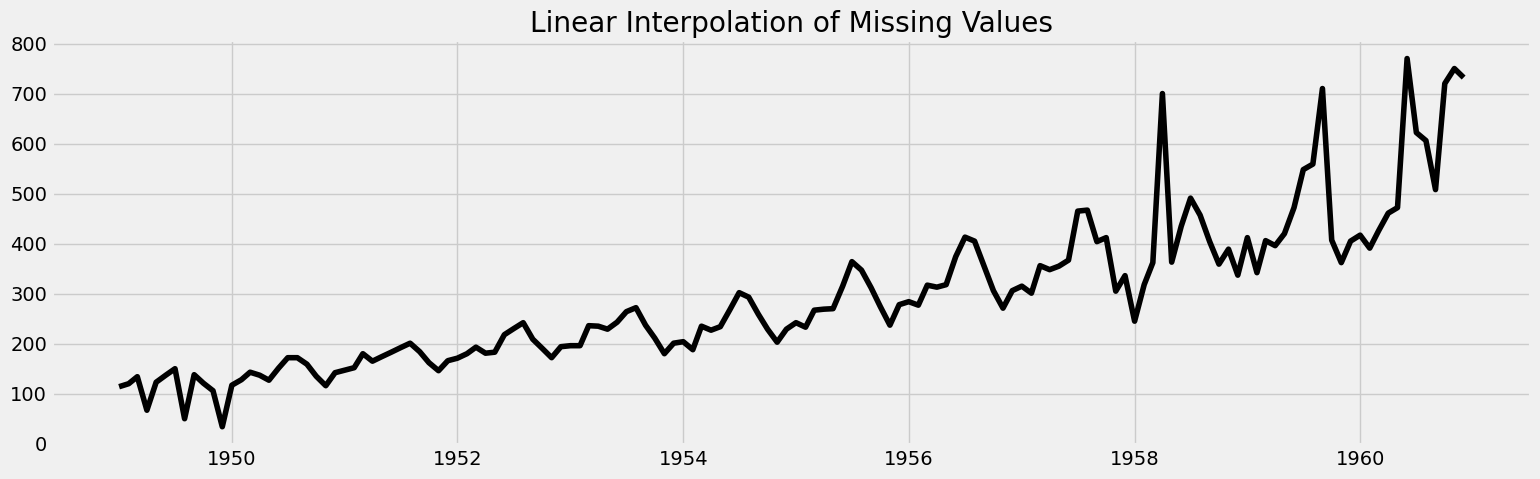

In [15]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

## Seasonal Interpolation

In [16]:
# lets find the dates where we have missing values
data.index[data['Customers'].isnull()]

DatetimeIndex(['1951-06-01', '1951-07-01', '1954-06-01', '1960-03-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [17]:
data.loc['1960-03'].fillna((data['1949-03':'1959-03':12].sum())/data['1949-03':'1959-03':12].shape[0], inplace=True)
data.loc['1954-06'].fillna((data['1949-06':'1953-06':12].sum())/data['1949-06':'1953-06':12].shape[0], inplace=True)
data.loc['1951-07'].fillna((data['1949-07':'1950-07':12].sum())/data.loc['1949-07':'1950-07':12].shape[0], inplace=True)
data.loc['1951-06'].fillna((data['1949-06':'1950-06':12].sum())/data['1949-06':'1950-06':12].shape[0], inplace=True)

In [18]:
data.isnull().sum().sum()

0

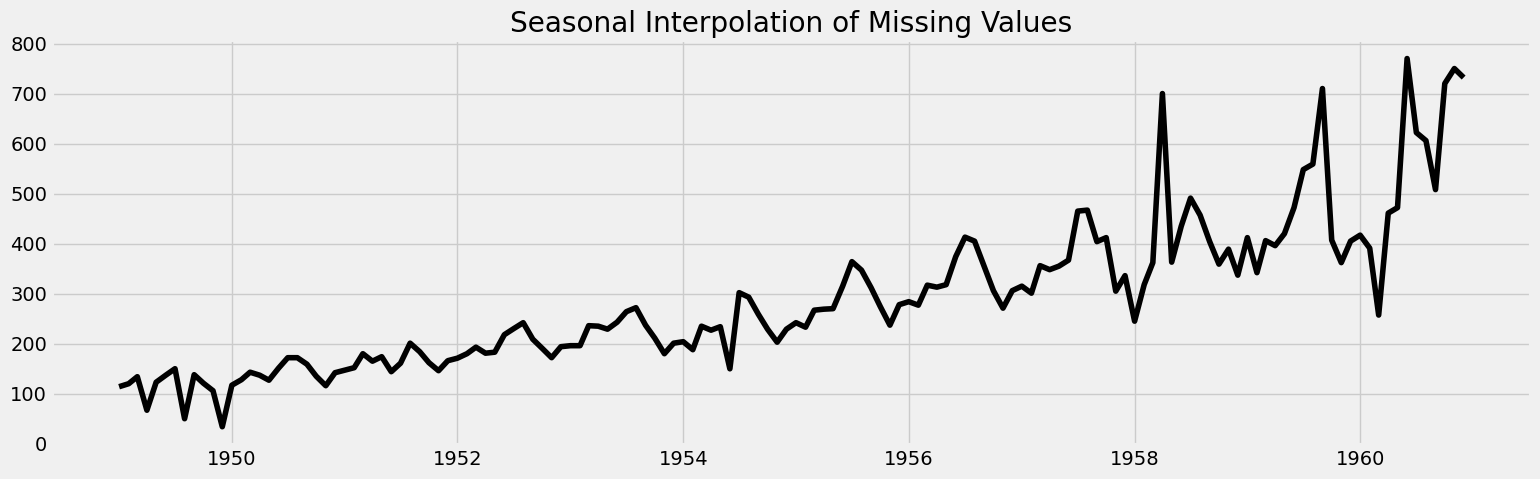

In [19]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data['Customers'],color='black')
plt.title("Seasonal Interpolation of Missing Values")
plt.show()